In [1]:
import torch
from tqdm import tqdm
from stable_baselines3 import PPO, SAC

from stable_baselines3.common.callbacks import EvalCallback

import os
import sys
sys.path.append(os.path.pardir)

from cpm_torch.CPM_Image import *
from cpm_torch.CPM import *
from cpm_torch.CPMEnv import *
from cpm_torch.Training.CPM_PPO import *
from cpm_torch.Training.CPM_Policy import *
from cpm_torch.Training.CPM_SAC_Policy import *

error: XDG_RUNTIME_DIR not set in the environment.


In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPUを利用します: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CPUを利用します")

config = CPM_config(
    size=(64, 64),  # 画像サイズ
    l_A=1.0,  # 面積エネルギー項の係数λ_A
    l_L=1.0,  # 周囲長エネルギー項の係数λ_L
    A_0=75.0,  # 目標細胞面積 A_0
    L_0=40.0,  # 目標細胞周囲長 L_0
    T=1.0,  # 温度パラメータ T
)
print(config.__dict__)

GPUを利用します: NVIDIA H100 PCIe
{'size': (64, 64), 'dim': 2, 'height': 64, 'width': 64, 'depth': 1, 'l_A': 1.0, 'l_L': 1.0, 'A_0': 75.0, 'L_0': 40.0, 'T': 1.0}


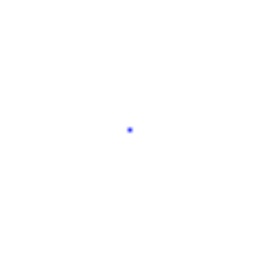

In [3]:
env = CPMEnv(config, device=device)  # CPM環境のインスタンスを作成
env.reset()  # 環境をリセット
env.render()  # 環境を描画

  0%|          | 0/10 [00:00<?, ?it/s]

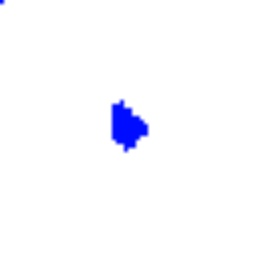

 10%|█         | 1/10 [00:00<00:02,  4.44it/s]

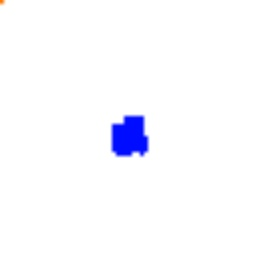

 20%|██        | 2/10 [00:00<00:01,  6.20it/s]

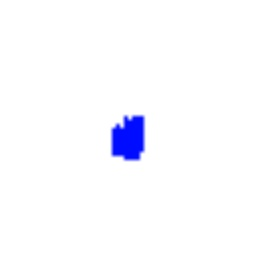

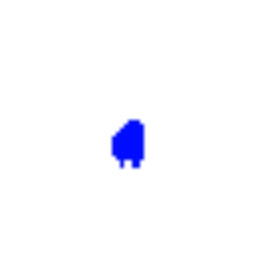

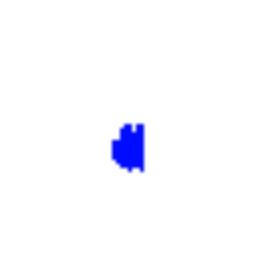

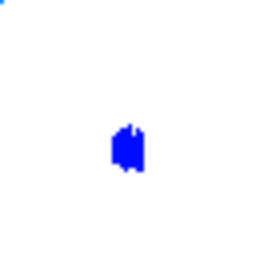

 30%|███       | 3/10 [00:00<00:01,  6.95it/s]

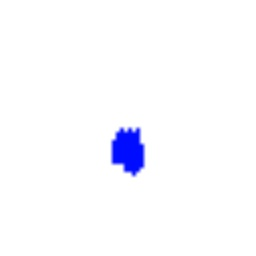

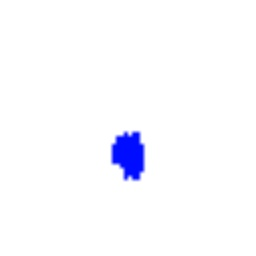

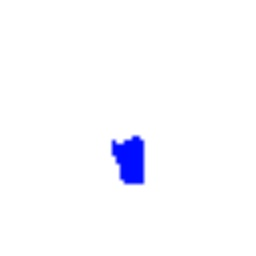

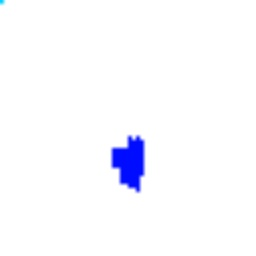

 40%|████      | 4/10 [00:00<00:00,  7.37it/s]

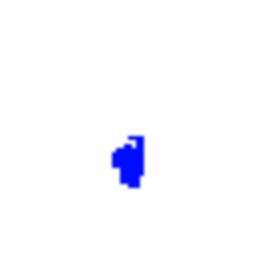

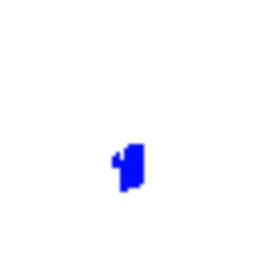

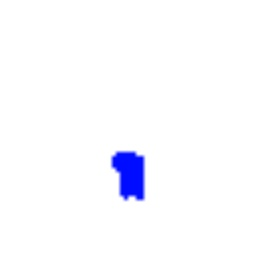

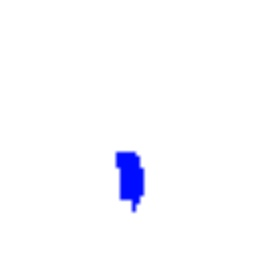

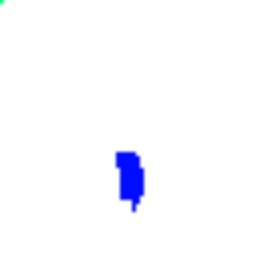

 50%|█████     | 5/10 [00:00<00:00,  7.59it/s]

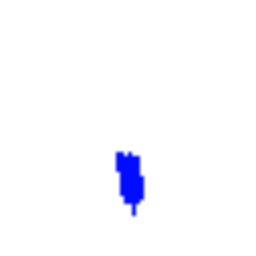

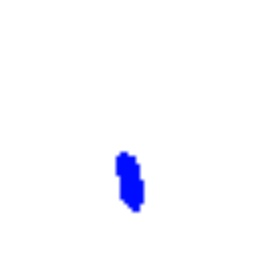

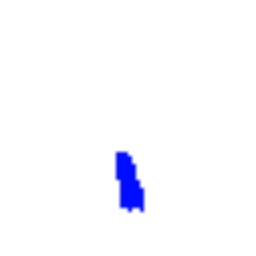

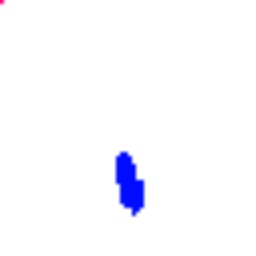

 60%|██████    | 6/10 [00:00<00:00,  7.77it/s]

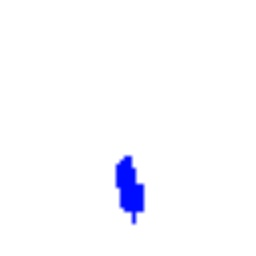

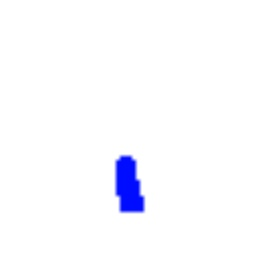

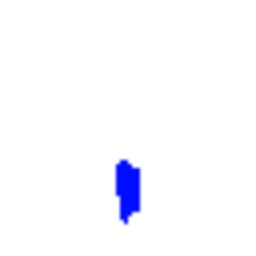

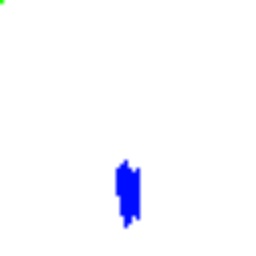

 70%|███████   | 7/10 [00:00<00:00,  7.89it/s]

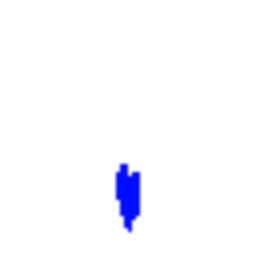

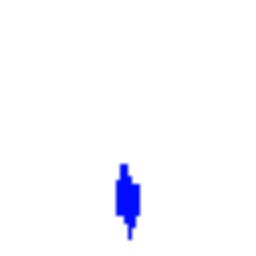

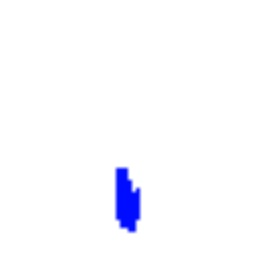

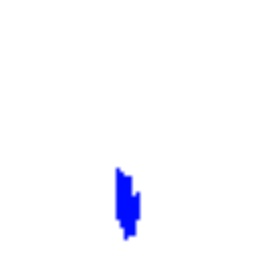

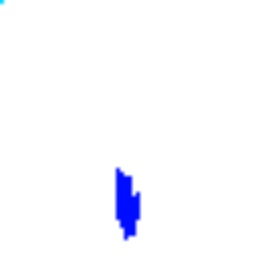

 80%|████████  | 8/10 [00:01<00:00,  7.93it/s]

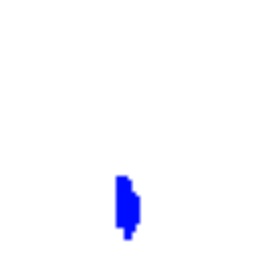

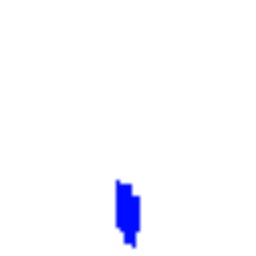

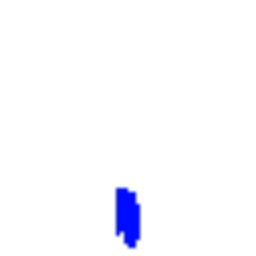

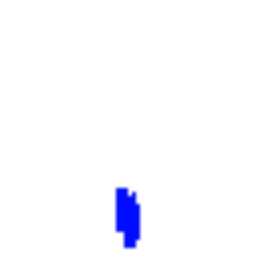

 90%|█████████ | 9/10 [00:01<00:00,  7.99it/s]

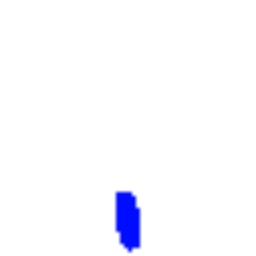

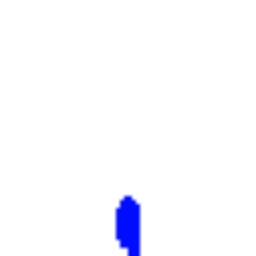

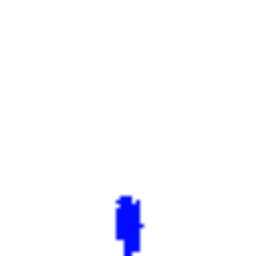

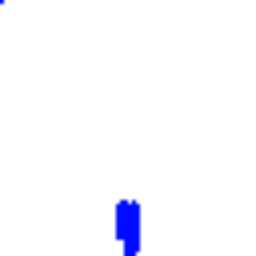

100%|██████████| 10/10 [00:01<00:00,  7.52it/s]


In [4]:
for i in tqdm(range(10)):
    for j in range(100):
        action = torch.zeros((env.action_space.shape[0],), device='cuda')  # ゼロアクションを生成
        action = action.reshape(-1, 4)
        #print("shape:", action.shape)  # アクションの形状を表示
        action[:, 0] = -300.0  # アクションの最初の要素を1.0に設定
        action.flatten()  # アクションをフラット化
        obs, reward, done, _ , info = env.step(action)
    imshow_map(obs)